Ideas
kc domine l'europe et le monde pour le moment
tableau qui montre les résultats par event ? Ex KC top 1 top 1 top 2 top 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [280]:
df = pd.read_csv('historical_results_rlcs2025.csv')

df.head()


,Tournament,Team,Placement,RLCS Points,Prize Money $,Region
0,EU Open 1,Karmine Corp,1st,15,15000,EU
1,EU Open 1,Team Vitality,2nd,10,9000,EU
2,EU Open 1,100%,3rd-4th,7,6000,EU
3,EU Open 1,Ninjas in Pyjamas,3rd-4th,7,6000,EU
4,EU Open 1,Dignitas,5th-6th,5,3600,EU


In [289]:
df['Region'].unique()

array(['EU'], dtype=object)

In [ ]:
# Keep only EU teams using boolean mask
df = df[df['Region'] == 'EU'].copy()

In [282]:
df

,Tournament,Team,Placement,RLCS Points,Prize Money $,Region
0,EU Open 1,Karmine Corp,1st,15,15000,EU
1,EU Open 1,Team Vitality,2nd,10,9000,EU
2,EU Open 1,100%,3rd-4th,7,6000,EU
3,EU Open 1,Ninjas in Pyjamas,3rd-4th,7,6000,EU
4,EU Open 1,Dignitas,5th-6th,5,3600,EU
5,EU Open 1,Gentle Mates Alpine,5th-6th,5,3600,EU
6,EU Open 1,RRG,7th-8th,3,2400,EU
7,EU Open 1,Geekay Esports,7th-8th,3,2400,EU
8,EU Open 1,Synergy,9th-12th,2,1800,EU
9,EU Open 1,Save the Game,9th-12th,2,1800,EU


In [283]:
# Define events order
event_order_mapping = {
    'EU Open 1': 1,
    'EU Open 2': 2,
    'EU Open 3': 3,
    'Birmingham Major': 4
}
df['Event_Order'] = df['Tournament'].map(event_order_mapping)

In [284]:
# Group and calculate cumulative points
points_progression = df.groupby(['Team', 'Event_Order'])['RLCS Points'].sum().reset_index()
points_progression['Cumulative Points'] = points_progression.groupby('Team')['RLCS Points'].cumsum()


In [285]:
# Select Top 8 EU
total_points = points_progression.groupby('Team')['Cumulative Points'].max()
top_teams = total_points.sort_values(ascending=False).head(8).index.tolist()

In [286]:
top_teams

['Karmine Corp',
 'Team Vitality',
 'Dignitas',
 'Geekay Esports',
 'Ninjas in Pyjamas',
 '100%',
 'Startpoint',
 'Gentle Mates Alpine']

In [ ]:
 #Filter
top_points_progression = points_progression[points_progression['Team'].isin(top_teams)]

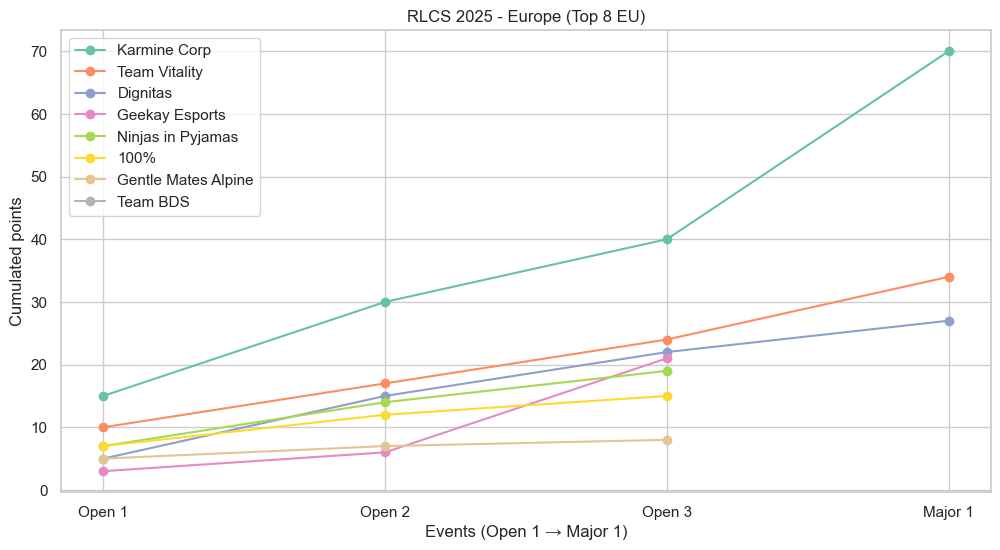

In [277]:

plt.figure(figsize=(12, 6))

for team in top_teams:
    team_data = top_points_progression[top_points_progression['Team'] == team]
    plt.plot(team_data['Event_Order'], team_data['Cumulative Points'], marker='o', label=team)

plt.title('RLCS 2025 - Europe (Top 8 EU)')
plt.xlabel('Events (Open 1 → Major 1)')
plt.ylabel('Cumulated points')
plt.xticks([1, 2, 3, 4], ['Open 1', 'Open 2', 'Open 3', 'Major 1'])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 1. Add Event 0 with 0 points for all teams
teams = top_points_progression['Team'].unique()

zero_points = pd.DataFrame({
    'Team': teams,
    'Event_Order': 0,
    'RLCS Points': 0,
    'Cumulative Points': 0
})

# Merge
full_points_progression = pd.concat([zero_points, top_points_progression], ignore_index=True)
full_points_progression = full_points_progression.sort_values(by=['Team', 'Event_Order'])


In [29]:
full_points_progression.head()

,Team,Event_Order,RLCS Points,Cumulative Points
0,100%,0,0,0
8,100%,1,7,7
9,100%,2,5,12
10,100%,3,3,15
1,Dignitas,0,0,0


array([[<Axes: title={'center': 'Event_Order'}>,
        <Axes: title={'center': 'RLCS Points'}>],
       [<Axes: title={'center': 'Cumulative Points'}>, <Axes: >]],
      dtype=object)

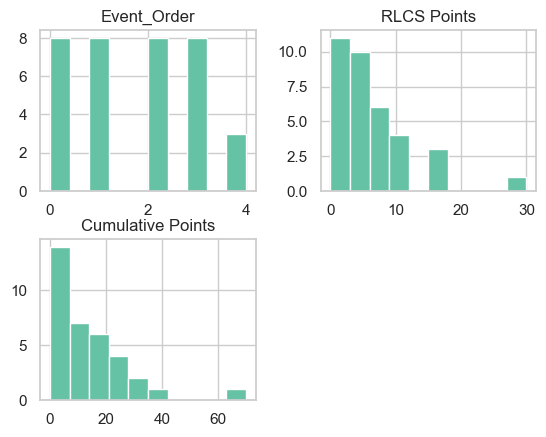

In [185]:
full_points_progression.hist()

In [ ]:
# 2. Add special DF for non qualified teams to Major
qualified_teams = ['Karmine Corp', 'Team Vitality', 'Dignitas']

# Not qualified
non_qualified_teams = [team for team in top_teams if team not in qualified_teams]

In [278]:
non_qualified_teams

['Geekay Esports',
 'Ninjas in Pyjamas',
 '100%',
 'Gentle Mates Alpine',
 'Team BDS']

In [101]:
import matplotlib as mpl

# Set the font to Poppins globally
mpl.rcParams['font.family'] = 'Poppins'

### Cumulative points

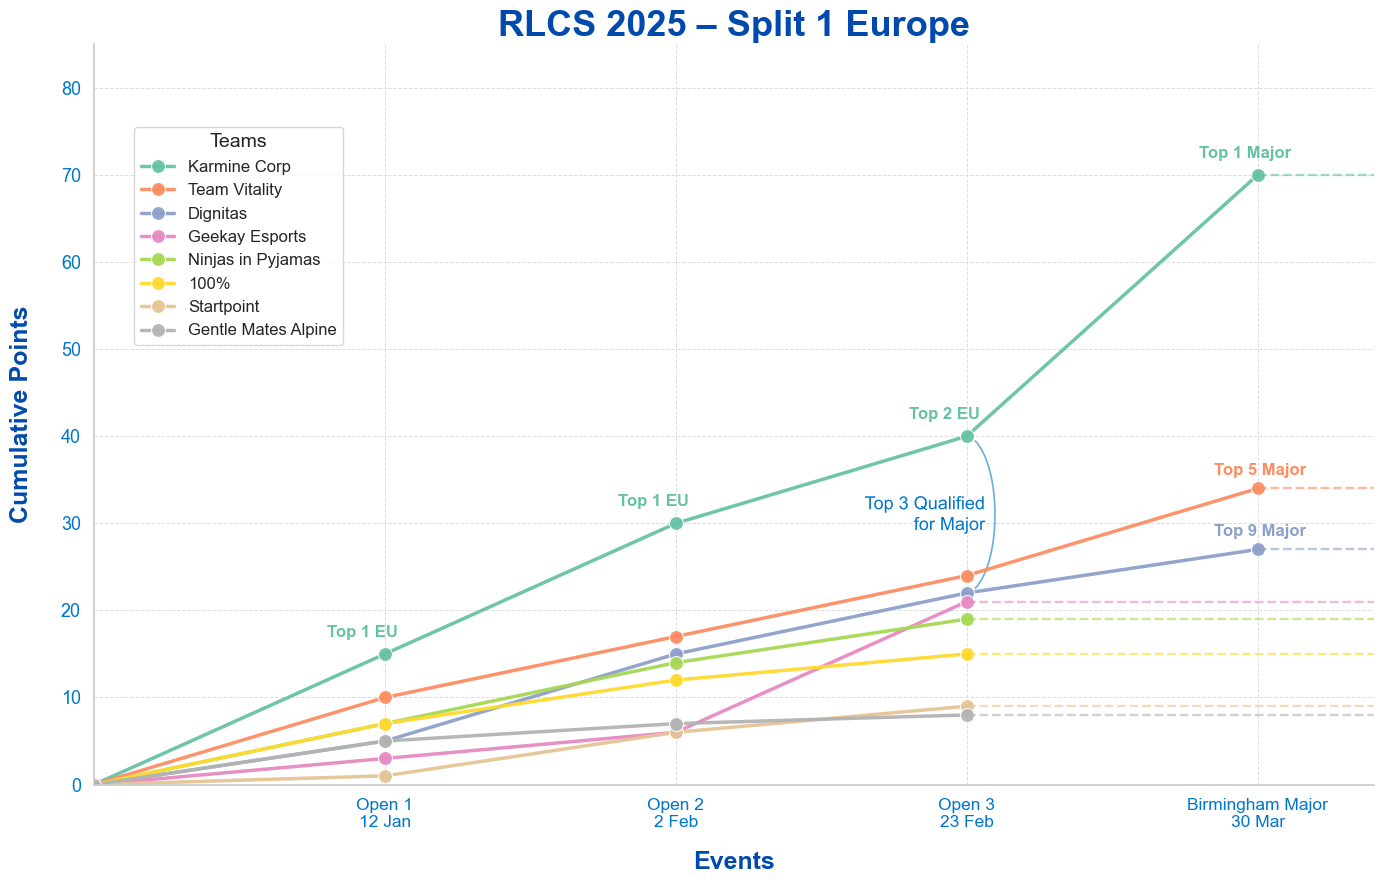

In [288]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as mpath
import seaborn as sns
import matplotlib.patheffects as path_effects

# Set Qualified teams
qualified_teams = ['Karmine Corp', 'Team Vitality', 'Dignitas']
non_qualified_teams = [team for team in top_teams if team not in qualified_teams]

# Setup viz
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

plt.figure(figsize=(14, 9))

team_colors = dict(zip(top_teams, sns.color_palette("Set2")))

# Qualified teams
for team in qualified_teams:
    team_data = full_points_progression[full_points_progression['Team'] == team]
    sns.lineplot(
        x=team_data['Event_Order'],
        y=team_data['Cumulative Points'],
        label=team,
        linewidth=2.5,
        marker="o",
        markersize=10,
        alpha=0.95
    )
    last_point = team_data[team_data['Event_Order'] == 4]
    if not last_point.empty:
        plt.plot(
            [4, 5],
            [last_point['Cumulative Points'].values[0], last_point['Cumulative Points'].values[0]],
            linestyle="--",
            color=team_colors[team],  
                linewidth=1.7,
                alpha=0.6 
        )

# Not qualified teams
for team in non_qualified_teams:
    team_data = full_points_progression[full_points_progression['Team'] == team]
    
    sns.lineplot(
        x=team_data[team_data['Event_Order'] <= 3]['Event_Order'],
        y=team_data[team_data['Event_Order'] <= 3]['Cumulative Points'],
        label=team,
        linewidth=2.5,
        marker="o",
        markersize=10,
        alpha=0.95
    )
    
    last_point = team_data[team_data['Event_Order'] == 3]
    if not last_point.empty:
        plt.plot(
                [3, 5],
                [last_point['Cumulative Points'].values[0], last_point['Cumulative Points'].values[0]],
                linestyle="--",
                color=team_colors[team],  
                linewidth=1.7,
                alpha=0.6 
        )


# Rounded line
event3_scores = full_points_progression[full_points_progression['Event_Order'] == 3]
top3_scores = event3_scores.sort_values('Cumulative Points', ascending=False).head(3)

min_y = top3_scores['Cumulative Points'].min()
max_y = top3_scores['Cumulative Points'].max()
mid_y = (min_y + max_y) / 2

Path = mpath.Path
path_data = [
    (Path.MOVETO, (3.028, min_y+0.5)),
    (Path.CURVE4, (3.12, min_y + (max_y - min_y) * 0.2)),
    (Path.CURVE4, (3.12, max_y - (max_y - min_y) * 0.2)),
    (Path.CURVE4, (3.028, max_y-0.5))
]

codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=1.2, edgecolor='#0077CC', alpha=0.6,linestyle="-")  
plt.gca().add_patch(patch)

# Text
plt.text(
    3.062, mid_y,  
    'Top 3 Qualified\nfor Major',
    fontsize=13,
    color="#0077CC",
    verticalalignment='center',
    horizontalalignment='right',
    path_effects=[path_effects.withStroke(linewidth=3, foreground="white")]
)



# Add text for Karmine Corp
kc_data = full_points_progression[full_points_progression['Team'] == 'Karmine Corp']
kc_labels = {1: 'Top 1 EU', 2: 'Top 1 EU', 3: 'Top 2 EU', 4: 'Top 1 Major'}

for i, row in kc_data.iterrows():
    if row['Event_Order'] in kc_labels:
        plt.text(
            row['Event_Order'] - 0.2,
            row['Cumulative Points'] + 2,
            kc_labels[row['Event_Order']],
            fontsize=12,
            color=team_colors['Karmine Corp'],
            fontweight='bold'
        )

# Add text for Team Vitality Major
vitality_data = full_points_progression[(full_points_progression['Team'] == 'Team Vitality') & (full_points_progression['Event_Order'] == 4)]

if not vitality_data.empty:
    row = vitality_data.iloc[0]
    plt.text(
        row['Event_Order'] - 0.15,
        row['Cumulative Points'] + 1.5,
        'Top 5 Major',
        fontsize=12,
        color=team_colors['Team Vitality'],
        fontweight='bold'
    )

# Add text for Dignitas Major
dignitas_data = full_points_progression[(full_points_progression['Team'] == 'Dignitas') & (full_points_progression['Event_Order'] == 4)]

if not dignitas_data.empty:
    row = dignitas_data.iloc[0]
    plt.text(
        row['Event_Order'] - 0.15,
        row['Cumulative Points'] + 1.5,
        'Top 9 Major',
        fontsize=12,
        color=team_colors['Dignitas'],
        fontweight='bold'
    )

# Formating
plt.title('RLCS 2025 – Split 1 Europe', fontsize=26, fontweight='bold', color='#004AAD')
plt.xlabel('Events', fontsize=18, fontweight='bold', color='#004AAD', labelpad=15)
plt.ylabel('Cumulative Points', fontsize=18, fontweight='bold', color='#004AAD', labelpad=20)
plt.xticks(
    [1, 2, 3, 4],
    ['Open 1\n12 Jan', 'Open 2\n2 Feb', 'Open 3\n23 Feb', 'Birmingham Major\n30 Mar'],
    fontsize=12.5,
    color="#0077CC"
    
)

plt.yticks(fontsize=13, color="#0077CC")

plt.xlim(0, 4.4)
plt.ylim(0, 85)

plt.grid(color='#DDDDDD', linestyle='--', linewidth=0.7)

plt.legend(title='Teams', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(0.025, 0.9))

plt.tight_layout()

# Remove top and right spines
sns.despine()

# Display and save
plt.savefig('new_points_progression_highres.png', dpi=300)
plt.show()
plt.close()

### Cumulative gains

In [ ]:

#Keep only EU teams

historical_results_eu = df[df['Region'] == 'EU']

event_mapping = {
    'EU Open 1': 1,
    'EU Open 2': 2,
    'EU Open 3': 3,
    'Birmingham Major': 4
}
historical_results_eu['Event_Order'] = historical_results_eu['Tournament'].map(event_mapping)

# Keep only relevant series
gains_progression = historical_results_eu[['Team', 'Event_Order', 'Prize Money $']].rename(columns={'Prize Money $': 'Gains'})

# add event 0
teams = gains_progression['Team'].unique()

zero_gains = pd.DataFrame({
    'Team': teams,
    'Event_Order': [0] * len(teams),
    'Gains': [0] * len(teams)
})

# merge and calculate cumulative gains
full_gains_progression = pd.concat([zero_gains, gains_progression], ignore_index=True)
full_gains_progression = full_gains_progression.sort_values(by=['Team', 'Event_Order'])
full_gains_progression['Cumulative Gains'] = full_gains_progression.groupby('Team')['Gains'].cumsum()

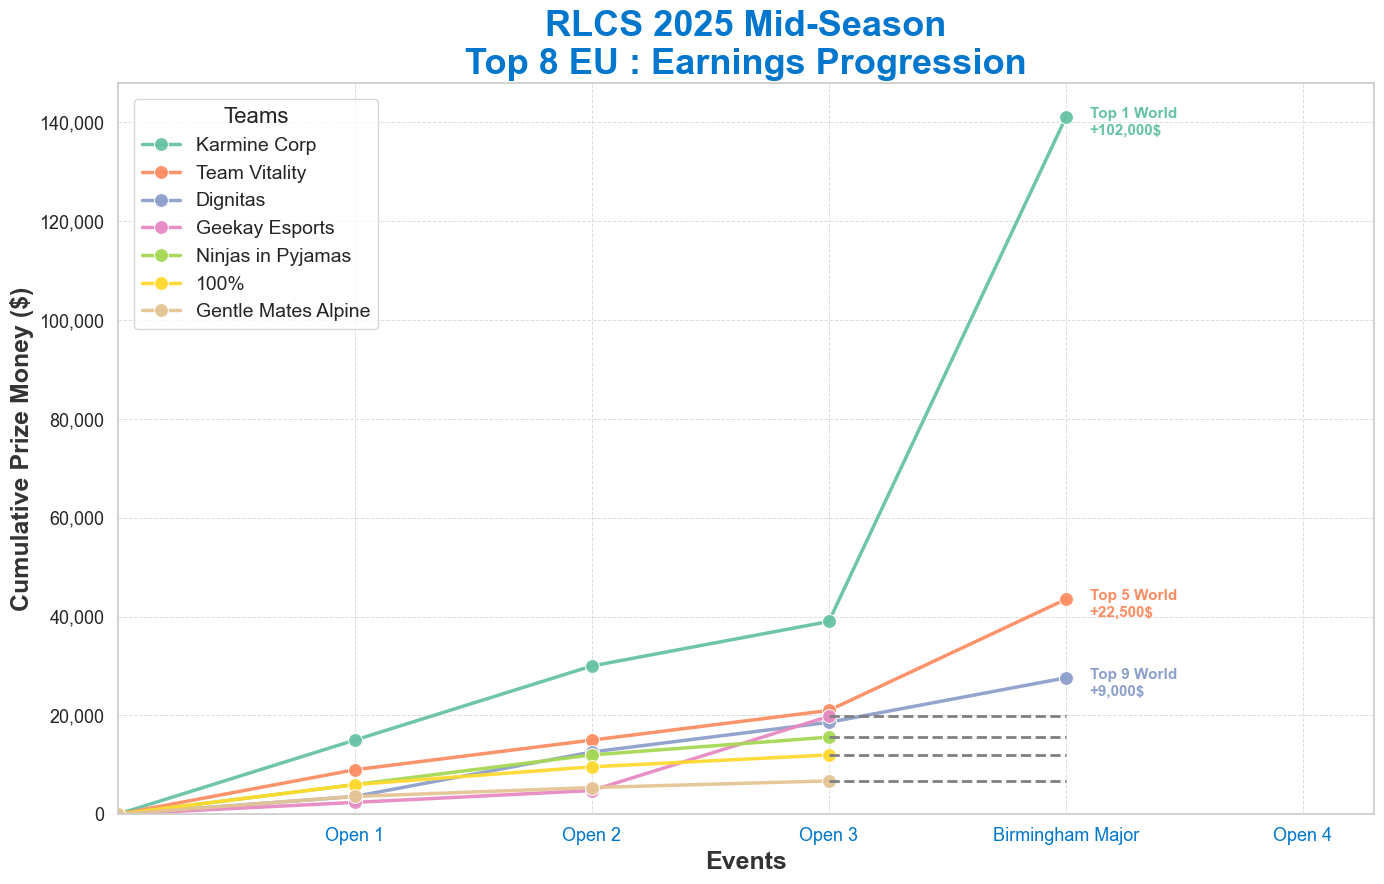

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker


# Setup 
mpl.rcParams['font.family'] = 'Poppins'
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Teams Top 8
top_teams = ['Karmine Corp', 'Team Vitality', 'Dignitas', 'Geekay Esports',
             'Ninjas in Pyjamas', '100%', 'Gentle Mates Alpine', 'Team BDS']

qualified_teams = ['Karmine Corp', 'Team Vitality', 'Dignitas']
non_qualified_teams = [team for team in top_teams if team not in qualified_teams]

plt.figure(figsize=(14, 9))

for team in qualified_teams:
    team_data = full_gains_progression[full_gains_progression['Team'] == team]
    sns.lineplot(
        x=team_data['Event_Order'],
        y=team_data['Cumulative Gains'],
        label=team,
        linewidth=2.5,
        marker="o",
        markersize=10,
        alpha=0.95
    )

for team in non_qualified_teams:
    team_data = full_gains_progression[full_gains_progression['Team'] == team]
    
    sns.lineplot(
        x=team_data[team_data['Event_Order'] <= 3]['Event_Order'],
        y=team_data[team_data['Event_Order'] <= 3]['Cumulative Gains'],
        label=team,
        linewidth=2.5,
        marker="o",
        markersize=10,
        alpha=0.95
    )
    
    last_point = team_data[team_data['Event_Order'] == 3]
    if not last_point.empty:
        plt.plot(
            [3, 4],
            [last_point['Cumulative Gains'].values[0], last_point['Cumulative Gains'].values[0]],
            linestyle="--",
            color="gray",
            linewidth=2
        )
#team colors
team_colors = dict(zip(top_teams, sns.color_palette("Set2")))

# Note for Karmine Corp (Major only)
kc_data_prize = full_gains_progression[(full_gains_progression['Team'] == 'Karmine Corp') & (full_gains_progression['Event_Order'] == 4)]

if not kc_data_prize.empty:
    row = kc_data_prize.iloc[0]
    plt.text(
        row['Event_Order'] + 0.1,
        row['Cumulative Gains'] - 3500,
        'Top 1 World\n+102,000$',
        fontsize=11,
        color=team_colors['Karmine Corp'],
        fontweight='bold'
    )

# note for Team Vitality (Major only)
vitality_data_prize = full_gains_progression[(full_gains_progression['Team'] == 'Team Vitality') & (full_gains_progression['Event_Order'] == 4)]

if not vitality_data_prize.empty:
    row = vitality_data_prize.iloc[0]
    plt.text(
        row['Event_Order'] + 0.1,
        row['Cumulative Gains'] - 3500,
        'Top 5 World\n+22,500$',
        fontsize=11,
        color=team_colors['Team Vitality'],
        fontweight='bold'
    )

# Note for Dignitas (Major only)
dignitas_data_prize = full_gains_progression[(full_gains_progression['Team'] == 'Dignitas') & (full_gains_progression['Event_Order'] == 4)]

if not dignitas_data_prize.empty:
    row = dignitas_data_prize.iloc[0]
    plt.text(
        row['Event_Order'] + 0.1,
        row['Cumulative Gains'] - 3500,
        'Top 9 World\n+9,000$',
        fontsize=11,
        color=team_colors['Dignitas'],
        fontweight='bold'
    )

plt.title('RLCS 2025 Mid-Season\nTop 8 EU : Earnings Progression', fontsize=26, fontweight='bold', color='#0077CC')
plt.xlabel('Events', fontsize=18, fontweight='bold', color='#333333')
plt.ylabel('Cumulative Prize Money ($)', fontsize=18, fontweight='bold', color='#333333')

plt.xticks(
    [1, 2, 3, 4, 5],
    ['Open 1', 'Open 2', 'Open 3', 'Birmingham Major', 'Open 4'],
    fontsize=13, color="#0077CC"
)
plt.yticks(fontsize=13)
plt.grid(color='#DDDDDD', linestyle='--', linewidth=0.7)
plt.legend(
    title='Teams',
    title_fontsize=16,
    fontsize=14,
    loc='center left',
    bbox_to_anchor=(0.005, 0.82)

)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(0, 5.3)
plt.ylim(bottom=0)

plt.tight_layout()
plt.savefig('rlcs_prize_money_progression.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Story telling : 

As part of my Data Analytics training, I wanted to challenge myself with a first personal project: collecting, exploring, and visualizing a real dataset entirely from scratch using Python.

Nothing too fancy — just a first step into hands-on data work, and a fun way to connect practice with passion. 🌟

## Context: Rocket League and RLCS

Rocket League is a fast-paced 3v3 esports game where players control rocket-powered cars to score goals — a mix between soccer and aerial stunts.It’s very fun to watch and one of the most accessible esports games for newcomers, thanks to its clear football-inspired mechanics.

The Rocket League Championship Series (RLCS) is the official global circuit.Each seasonal split includes:

Three regional Opens (teams qualify for the Major)

One Major event (an international showdown between top regional teams)

### * Points accumulation towards Worlds qualification, scaled on results 

Majors offer significantly more points and prize money than Opens:

A Major win grants 30 points, compared to 15 points for an Open win in the first split — plus a huge increase in earnings for top-performing teams.

### Mid-Season Checkpoint (after Open 3 + Birmingham Major)

For this project, I focused on the Top 8 European teams, analyzing:
Cumulative RLCS Points Progression
Cumulative Prize Money Earnings

(Note: Open 4 is still ongoing and ends on May 4.)

## What the charts show:

### Points Progression:
Karmine Corp has built a strong lead after an exceptional first split — 70 points already, far ahead of the competition.

The mid-pack battle remains incredibly open:
➔ Only 26 points separate Team Vitality (2nd) and Gentle Mates Alpine (8th),
➔ Meaning many teams — even outside of the actual Top 8 — are still realistically in contention for a Top 4 finish and Worlds qualification.

### Notable progression:
Geekay Esports made a major leap after winning Open 3, jumping from Top 8 into a strong Top 4 position — showing how one big result can instantly transform a team's trajectory.

### Key dynamic to watch:

The second split offers even more points opportunities than the first:

➔ Each Open (Open 4–6) and the Major will reward slightly higher points.
➔ A strong performance could massively shift the standings, making comebacks highly possible.

### In short:

Karmine Corp (KC) is almost mathematically qualified already, barring an unprecedented collapse — having already reached 70 points, they are getting very close to last season’s estimated Worlds qualification threshold (~85 points).

Meanwhile, all other Top 8 teams still have everything to fight for.

Momentum from Split 1 matters, but Split 2's structure keeps the race wide open for many teams.

### Prize Earnings:

While point races are tight, prize money disparities are already significant:
➔ Consistent high placements help, but Majors are where financial gaps really widen.

### Key Learnings:

Practiced using Python for real-world data visualization.
Strengthened storytelling techniques for time-based and cumulative data analysis.
Improved clarity in identifying key competitive dynamics hidden behind raw numbers.

Excited to follow how things evolve after Open 4 — with even more points at stake and potential major shifts on the horizon, it’s shaping up to be a thrilling second half of the season! 🚀

(Data source: Liquipedia RLCS 2025)

#DataAnalytics #DataVisualization #Python #RocketLeague #RLCS2025 #EsportsData #DataStorytelling



Ideas : pic of RL or KC

first slide : ranking easy to understand